# matplotlib image tutorial

### author: davidkariuki259

This notebook follows steps outlined in the matplotlib website https://matplotlib.org/users/image_tutorial.html

In [1]:
# we would like our plots to appear inline
%matplotlib inline

In [2]:
#we can now import the modules we will be using
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [3]:
img=mpimg.imread('stinkbug2.png') #load the image we will be working on
#note that natively, matplotlib only supports PNG image format

In [4]:
img

array([[[0.40784314, 0.40784314, 0.40784314, 1.        ],
        [0.40784314, 0.40784314, 0.40784314, 1.        ],
        [0.40784314, 0.40784314, 0.40784314, 1.        ],
        ...,
        [0.42745098, 0.42745098, 0.42745098, 1.        ],
        [0.42745098, 0.42745098, 0.42745098, 1.        ],
        [0.42745098, 0.42745098, 0.42745098, 1.        ]],

       [[0.4117647 , 0.4117647 , 0.4117647 , 1.        ],
        [0.4117647 , 0.4117647 , 0.4117647 , 1.        ],
        [0.4117647 , 0.4117647 , 0.4117647 , 1.        ],
        ...,
        [0.42745098, 0.42745098, 0.42745098, 1.        ],
        [0.42745098, 0.42745098, 0.42745098, 1.        ],
        [0.42745098, 0.42745098, 0.42745098, 1.        ]],

       [[0.41960785, 0.41960785, 0.41960785, 1.        ],
        [0.41568628, 0.41568628, 0.41568628, 1.        ],
        [0.41568628, 0.41568628, 0.41568628, 1.        ],
        ...,
        [0.43137255, 0.43137255, 0.43137255, 1.        ],
        [0.43137255, 0.431372

It is important to note that the dtype is float32, as matplotlib has rescaled 8bit data from each channel to floating point data between 0.0 and 1.0. This is because matplotlib can handle float32 and uint8, but image reading/writing is limited to uint data in other formats apart from PNG. On the other hand, Pillow can only work with uint8

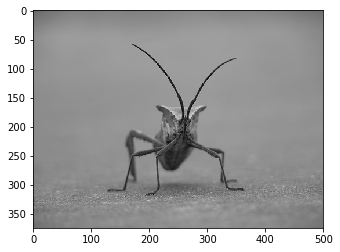

In [5]:
#we can now show our loaded image by plotting as we would any numpy array
imgplot=plt.imshow(img)

(-0.5, 499.5, 374.5, -0.5)

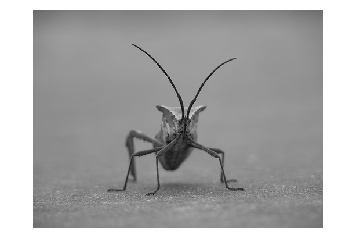

In [6]:
#we can hide axes using 
plt.imshow(img)
plt.axis('off')

## Applying Pseudocolor schemes to image plots

Pseudocolor is a useful tool for enhancing contrast and data visualization. eg- this is useful in data presentation using projectors, as their contrast is typically poor.

Note: Pseudocolor is only relevant to single-channel. grayscale, luminosity images. eg- our image is an RGB image, since all R,G.B values are similar.

Side note: the extra value (1.0)  is the Alpha value, introduced by conversion of the downloaded webp image to PNG via GIMP

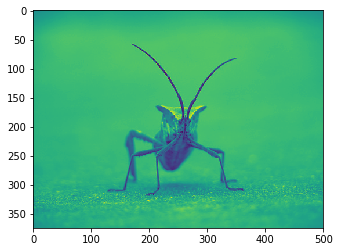

In [7]:
#since all R,G,B values are similar, we can just pickone channel of our data
lum_img=img[:,:,0] #array slicing
plt.imshow(lum_img)

Since the image is a luminosity (2D, no color) image, the default colormap, viridis, is appled. Some other colormaps include:

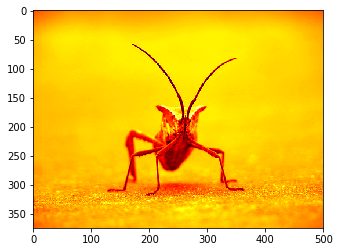

In [8]:
plt.imshow(lum_img,cmap="hot")

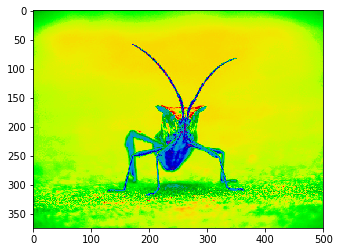

In [9]:
#the colormap of an existing plot object can also be changed using the set_cmap() method
imgplot=plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')

Numerous colormaps exist- which can be used to apply various effects- of which a comprehensive list can be found at https://matplotlib.org/examples/color/colormaps_reference.html

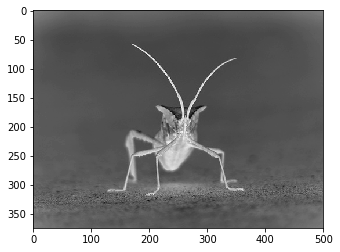

In [10]:
#gray night vision effect
plt.imshow(lum_img,cmap="binary")

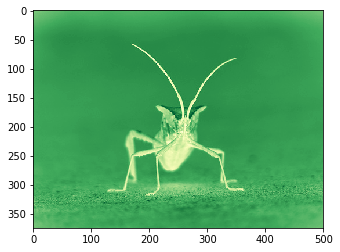

In [11]:
#green night vision effect
plt.imshow(lum_img,cmap="YlGn")

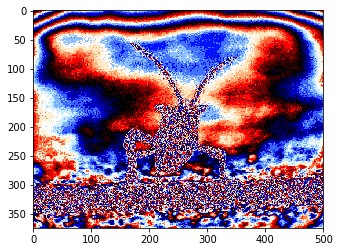

In [12]:
#weird colorful effect
plt.imshow(lum_img,cmap="flag")

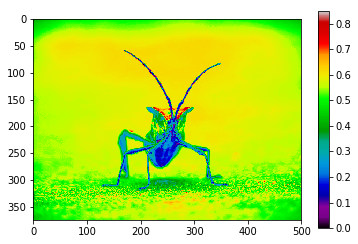

In [13]:
#we can furthermore add a color scale reference to show what value a given color represents. 
#This is achieved by adding a color bar
imgplot=plt.imshow(lum_img,cmap="nipy_spectral")
plt.colorbar()

### Examining image data in a specific range

Sometimes, it is necessary to enhance a particular region of an image while sacrificing detail in colors that don't vary much or don't matter. eg- enhance contrast or expand contrast in a particular region.
In such an instance, we can use the histogram of image data to identify interesting regions of the image.

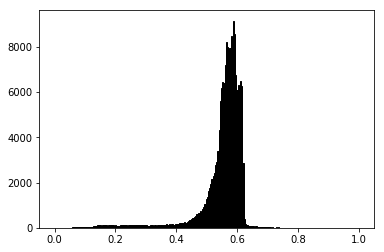

In [14]:
plt.hist(lum_img.ravel(),bins=256,range=(0.0,1.0),fc='k',ec='k')
plt.show()

Oftenly, the "interesting/most visual" part of the image is around the peak. Thus, we can get extra contrast by clipping regions below and/or above  the peak.
As per the histogram above, there isn't much useful info in the high end. (ie- there aren't many white objects in the image). We can therefore adjust the upper limit, so that we effectively "zoom in on" part of the histogram. This is achieved by passing the clim argument to imshow

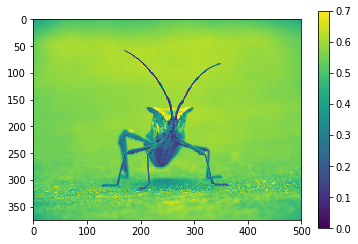

In [15]:
imgplot=plt.imshow(lum_img)
imgplot.set_clim(0.0,0.7)
plt.colorbar()

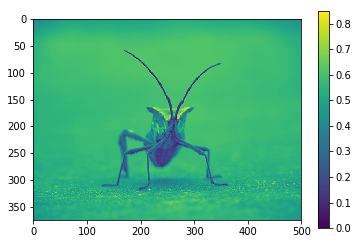

In [16]:
#without the contrast:
imgplot=plt.imshow(lum_img)
plt.colorbar()

### Array Interpolation schemes

interpolation calculates what color or value of a pixel should be according to a defined mathematical scheme (there are several). An example of this is resizing of an image: number of pixels change but the same info should be retained. Interpolation is then used to fill in space created by missing pixels, commonly resulting in a pixelated image in the case where the image is blown up.

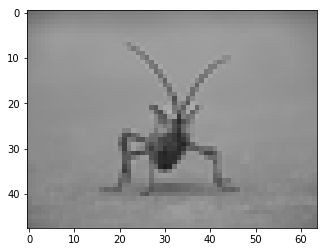

In [17]:
#to demonstrate the concept, we can shrink our image and draw it on screen
from PIL import Image
img=Image.open('stinkbug.png')
img.thumbnail((64,64), Image.ANTIALIAS) #resize image in-place
imgplot=plt.imshow(img)

The above image uses the default interpolation. Arguments can be passed to imshow() as demonstrated below:

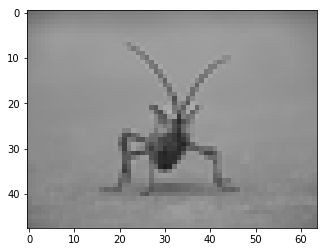

In [18]:
imgplot=plt.imshow(img, interpolation="none")

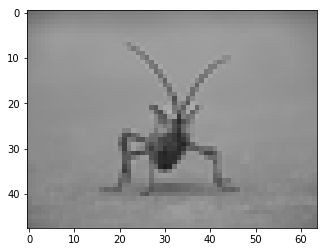

In [19]:
imgplot=plt.imshow(img, interpolation="nearest")

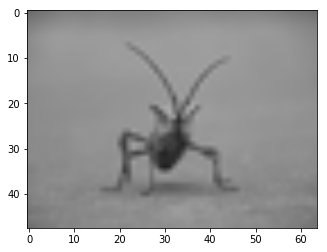

In [20]:
imgplot=plt.imshow(img, interpolation="bilinear")

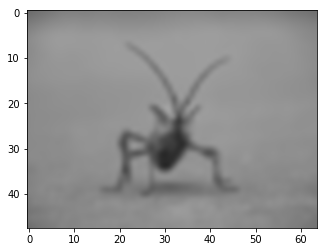

In [21]:
imgplot=plt.imshow(img, interpolation="bicubic")

Bicubic interpolation is often used in blowing up photos, as users tend to prefer blurry to pixelated images.